#  Diabetic Retinopathy Debrecen Data Set


## Data source:
The data used in this machine learning project can be found at UCI Machine Learning Repository.  
<https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set>

## Attribute Information:

0. quality: The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.
1. prescreen: The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.
2. ma_detection_0.5: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.5
3. ma_detection_0.6: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.6
4. ma_detection_0.7: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.7
5. ma_detection_0.8: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.8
6. ma_detection_0.9: The results of MA detection, which is the number of MAs found at the confidence level alpha = 0.9
7. ma_detection_1.0: The results of MA detection, which is the number of MAs found at the confidence level alpha = 1.0
8. exudates_0.1: The number of exudates found at the confidence level alpha = 0.1 with normalization*.
9. exudates_0.2: The number of exudates found at the confidence level alpha = 0.2 with normalization*.
10. exudates_0.3: The number of exudates found at the confidence level alpha = 0.3 with normalization*.
11. exudates_0.4: The number of exudates found at the confidence level alpha = 0.4 with normalization*.
12. exudates_0.5: The number of exudates found at the confidence level alpha = 0.5 with normalization*.
13. exudates_0.6: The number of exudates found at the confidence level alpha = 0.6 with normalization*.
14. exudates_0.7: The number of exudates found at the confidence level alpha = 0.7 with normalization*.
15. exudates_0.8: The number of exudates found at the confidence level alpha = 0.8 with normalization*.

* Exudates are represented by a set of points rather than the number of pixels constructing the lesions, hence these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.

16. dist_macula_optic: The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the diameter of the ROI.
17. diameter_optic: The diameter of the optic disc.
18. am_fm: The binary result of the AM/FM-based classification.
19. Class: Class label. 1 = contains signs of Diabetic Retinopathy (DR) (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.


# Load the library and data

- Load the required libraries.
- Import the arff data and convert it into a Pandas dataframe.
- Add the column names to the dataframe.

In [30]:
from scipy.io import arff
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import plot

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])
df.columns = ["quality", "prescreen", 
              "ma_detection_0.5", "ma_detection_0.6", "ma_detection_0.7", 
              "ma_detection_0.8", "ma_detection_0.9", "ma_detection_1.0",
              "exudates_0.1", "exudates_0.2", "exudates_0.3",
              "exudates_0.4", "exudates_0.5", "exudates_0.6",
              "exudates_0.7", "exudates_0.8",
              "dist_macula_optic", "diameter_optic", "am_fm", "Class"
             ]

# Preview the data

In [31]:
df.head()

,quality,prescreen,ma_detection_0.5,ma_detection_0.6,ma_detection_0.7,ma_detection_0.8,ma_detection_0.9,ma_detection_1.0,exudates_0.1,exudates_0.2,exudates_0.3,exudates_0.4,exudates_0.5,exudates_0.6,exudates_0.7,exudates_0.8,dist_macula_optic,diameter_optic,am_fm,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


# Check for any missing value
There is no missing value as shown below.

In [32]:
df.isna().any()

quality              False
prescreen            False
ma_detection_0.5     False
ma_detection_0.6     False
ma_detection_0.7     False
ma_detection_0.8     False
ma_detection_0.9     False
ma_detection_1.0     False
exudates_0.1         False
exudates_0.2         False
exudates_0.3         False
exudates_0.4         False
exudates_0.5         False
exudates_0.6         False
exudates_0.7         False
exudates_0.8         False
dist_macula_optic    False
diameter_optic       False
am_fm                False
Class                False
dtype: bool

# Clean the data
- Clean the 'Class' variable to integer value

In [33]:
df["Class"] = [j.replace("b", "").replace("'", "") for j in df["Class"].astype(str)]
df["Class"] = df["Class"].astype(int)
df["Class"].head()

0    0
1    0
2    1
3    0
4    1
Name: Class, dtype: int32

# Data Partitioning
- Subset the features as X, and target class as Y
- Split the data into 60% training set and 40% testing set. Stratify split is performed to maintain the class proportion among training and testing set.
- Note that the proportion of target class = 1 is 53.1%, which is approximately 50%. Hence, the target class is balanced, active measures such as oversampling is not required to balance the target class.

In [34]:
Y = df.iloc[:, -1]
X = df.iloc[:, :-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, stratify = Y, random_state = 123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(y_train.mean(), y_test.mean()) # proportion of class = 1 is similar for training and test set (53%)

(690, 19) (461, 19) (690,) (461,)
0.5304347826086957 0.5314533622559653


# Modelling 
4 models were trained and tested on the data:
1. Logistic Regression
2. Random Forest classifier
3. K-Nearest Neighbor classifier
4. Linear Support Vector Machine (SVM)

### PCA & Linear Support Vector Machine (SVM)
First, we perform PCA on the training data. We examined elbow curve of the variance explained ratio.  
We determined that the optimal number of principal components to use is 2 based on the elbow curve shown below.

0.9540654174434526

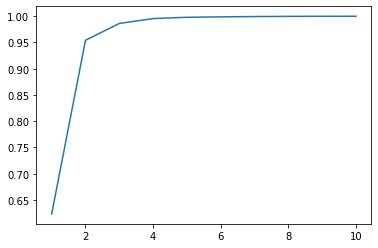

In [40]:
pca = PCA(n_components=10)
X_r = pca.fit(x_train).transform(x_train)
explained = pca.explained_variance_ratio_.cumsum()
xaxis = [j+1 for j in range(len(explained))]

plt.plot(xaxis, explained)
explained[1]

### Scatter plot of the two principal components
- Even with the two principal components, the target classes are not linearly separable as shown in the scatter plot.
- Therefore, it is suggested to use a non-linear kernel when performing SVM.

In [51]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(x_train)
X_pca_test = pca.fit_transform(x_test)

X_pca_train_plot = pd.DataFrame(X_pca_train)
X_pca_train_plot["y"] = y_train.values
X_pca_train_plot["y"] = X_pca_train_plot["y"].astype(str)
X_pca_train_plot.columns = ["pc1", "pc2", "y"]
fig = px.scatter(X_pca_train_plot, x="pc1", y = "pc2", color = "y", opacity =0.6) #       color='species')
plot(fig)



'temp-plot.html'

# SVM with Radial Basis Function

In [73]:
svm = SVC(kernel = "rbf", C = 1, max_iter = 1e4, random_state = 123, gamma = "scale")
svm.fit(X_pca_train, y_train)
y_pred= svm.predict(X_pca_test)
report = classification_report(y_test, y_pred, output_dict = True)
report

{'0': {'precision': 0.6027397260273972,
  'recall': 0.8148148148148148,
  'f1-score': 0.6929133858267718,
  'support': 216},
 '1': {'precision': 0.7633136094674556,
  'recall': 0.5265306122448979,
  'f1-score': 0.6231884057971014,
  'support': 245},
 'accuracy': 0.6616052060737527,
 'macro avg': {'precision': 0.6830266677474264,
  'recall': 0.6706727135298564,
  'f1-score': 0.6580508958119367,
  'support': 461},
 'weighted avg': {'precision': 0.6880772562721137,
  'recall': 0.6616052060737527,
  'f1-score': 0.6558578107567733,
  'support': 461}}

In [80]:
precision = report["1"]["precision"]
recall = report["1"]["recall"]
f1 = report["1"]["f1-score"]
accuracy = report["accuracy"]

report_df = pd.DataFrame([precision, recall, f1, accuracy]).T
report_df.columns = ['precision', 'recall', 'f1', 'accuracy']
report_df

,precision,recall,f1,accuracy
0,0.763314,0.526531,0.623188,0.661605
